# <font color='blue'>Credit Card Fraud Detecion</font>

## Table of Contents 
1. [Research Problem](#a_ID)

2. [Data Preparation](#b_ID)

    2.1 [Class Imbalance](#b1_ID)

## <a id="a_ID">1. Research Problem</a>

Which machine learning model best detects credit card fraud from customer transactions?

kaggle Dataset: Credit Card Fraud Detection

## <a id="b_ID">2. Data Preparation</a>

In [1]:
# Import numpy and pandas libraries for data analysis
import numpy as np
import pandas as pd

In [2]:
# Import matplotlib and seaborn libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Read the credit card fraud dataset
creditcard = pd.read_csv('creditcard.csv')

In [4]:
# Find the dimension of the dataframe
print("Dataset Shape: ", creditcard.shape)

Dataset Shape:  (284807, 31)


There are 284,807 records (rows) and 31 features (columns) in this dataset.

In [5]:
# Find the index and data type of the features
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are 31 features and the target attribute is the "Class" atribute. 0 represents a genuine transaction and 1 represents a fraudulent transaction.

In [6]:
# Summary statistics for numeric features
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Convert Time, Amount, and Class features to appropriate numeric attributes for storage space efficiency
creditcard['Time'] = creditcard['Time'].astype(np.int32)
creditcard['Amount'] = creditcard['Amount'].astype(np.int16)
creditcard['Class'] = creditcard['Class'].astype(np.int8)

# Confirm data types are appropriate
creditcard.dtypes

Time        int32
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount      int16
Class        int8
dtype: object

In [8]:
# Look at first 5 records
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69,0


In [9]:
# Look at last 5 records
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10,0
284806,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217,0


In [10]:
# Look at random 5 records
creditcard.sample(5, random_state = 15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
277874,167910,-0.742035,0.518585,3.298684,4.487945,-0.327247,3.081242,-0.805596,0.649308,-0.052301,...,0.037212,0.607006,-0.533498,-1.150243,0.100142,0.663737,-0.232040,-0.109701,48,0
23566,32823,-0.731760,0.873518,0.852756,0.482321,1.459871,0.042268,0.766982,-0.067850,-1.186054,...,-0.304661,-0.933934,-0.221796,-1.047246,0.014938,-0.628713,0.003643,0.126814,16,0
119623,75522,1.334494,-1.198741,0.673645,-1.469945,-1.488445,-0.104321,-1.180439,0.080120,-2.053690,...,-0.260405,-0.480765,0.154931,-0.029959,0.023197,-0.402941,0.049742,0.024200,55,0
82570,59457,1.025536,-0.677167,1.057977,0.133187,-1.075955,0.409733,-0.820370,0.373310,1.060163,...,-0.132977,-0.280523,0.061696,0.084985,-0.012786,0.951810,-0.036144,0.008008,60,0
76851,56776,1.188285,0.025677,1.099394,1.218587,-0.657526,0.100196,-0.504328,0.066567,0.780252,...,-0.083939,0.014765,-0.078048,-0.090573,0.513615,-0.380958,0.078187,0.035239,9,0


In [11]:
# Count the number of missing values in the dataset
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values.

In [12]:
# Count the number of duplicated records in the dataset
creditcard.duplicated().sum(axis=0) # 0 for rows and 1 for columns

1081

There are 1081 duplicate records.

In [13]:
# Drop all duplicate records except for the first occurance
creditcard = creditcard.drop_duplicates()

In [14]:
# Check the dimension of the dataframe after duplicate records are dropped
creditcard.shape

(283726, 31)

After duplicate records are dropped, there are now 283,726 records.

In [15]:
# Find the unique values in the "Class" column (target attribute) of the dataframe
print(creditcard['Class'].unique())

[0 1]


There are two classes for the target attribute, "Class" (binary classifcation). 0 represents a genuine transaction and 1 represents a fraudulent transaction.

In [16]:
# Find the unique values in the "Time" column of the dataframe
creditcard['Time'].nunique()

124592

In [17]:
# Percentage of unique values in the "Time" column
124592 / 283726 * 100

43.912789099342326

There are 124,592 unique values in the "Time" column (43.91%).

In [18]:
# Find the unique values in the "Amount" column of the dataframe
creditcard['Amount'].nunique()

2383

In [19]:
# Percentage of unique values in the "Amount" column
2383 / 283726 * 100

0.8398948281088092

Interestingly, there are 2383 unique values in the "Amount" column (0.84%).

### <a id="b1_ID">2.1 Class Imbalance</a>

In [21]:
# Determine class imbalance
creditcard.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [21]:
# Class imbalance percentage
print("fraudulent transactions:", 473 / 283726 * 100) 
print("genuine transactions:", 283253 / 283726 * 100) 

fraudulent transactions: 0.1667101358352777
genuine transactions: 99.83328986416473


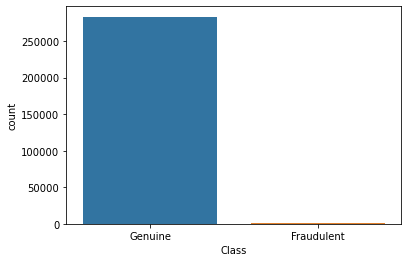

In [22]:
# Count plot of class imblance of "Class" attribute
class_imbalance_plot = sns.countplot(x = "Class", data = creditcard)
class_imbalance_plot.set_xticklabels(['Genuine', 'Fraudulent'])

plt.show()

There are 283,253 genuine transactions and 473 fradulent transactions. Fradulent transactions are only 0.17% of the dataset and genuine tranactions are 99.83% therefore, we will need to address the very high class imbalance in our analysis later on.